In [1]:
#conda list -e > requirements.txt

# Import Libraries

In [2]:
import cv2
import face_recognition
import glob
import matplotlib.pyplot as plt

# Prepare Dataset

In [3]:
image_encodings = []
persons = []

In [4]:
paths = glob.glob("Attendance-System-Project/Dataset/*")
for path in paths:
    name = path.split("\\")[-1].split(".")[0]
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_encoding = face_recognition.face_encodings(rgb_img)[0]
    image_encodings.append(img_encoding)
    persons.append(name)

In [5]:
def detect_known_faces(img, image_encodings = image_encodings, persons = persons):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fc = []
    fn = []
    face_locations = face_recognition.face_locations(rgb_img)
    face_encodings = face_recognition.face_encodings(rgb_img, face_locations)
    for face_encoding,face_location in zip(face_encodings,face_locations):
        matches = face_recognition.compare_faces(image_encodings, face_encoding)
        name = "Unknown"
        if True in matches:
            first_match_index = matches.index(True)
            name = persons[first_match_index]
        fc.append(face_location)
        fn.append(name)
    return fc,fn

[(56, 175, 163, 67)] ['Kundai ']


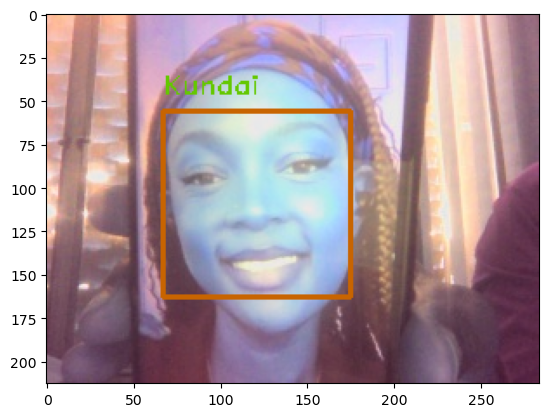

In [8]:
frame = cv2.imread("Attendance-System-Project/Dataset/Kundai .jpg")
face_locations, face_names = detect_known_faces(frame)
print(face_locations, face_names)
for face_loc, name in zip(face_locations, face_names):
    y1, x2, y2, x1 = face_loc
    cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (100, 200, 0), 1)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (200, 100, 0), 2)
    #cv2.imshow("Frame", frame)
    plt.imshow(frame)

# Face recognition with camera

In [9]:
# Load Camera
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    # Detect Faces
    face_locations, face_names = detect_known_faces(frame)
    for face_loc, name in zip(face_locations, face_names):
        y1, x2, y2, x1 = face_loc
        cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 200), 2)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)
        cv2.imshow("Frame", frame)
    key = cv2.waitKey(1)
    if key == 27 or key == ord('q'):
        break
cv2.destroyAllWindows()
cap.release()

# Save Encodings and names in file

In [10]:
image_encodings[0]

array([-1.87014922e-01,  3.38051654e-02,  4.77013364e-02,  1.77126788e-02,
       -1.28368232e-02, -1.23934127e-01,  6.86429068e-02, -1.37889281e-01,
        9.68815237e-02, -5.88619448e-02,  2.10614085e-01, -6.68252781e-02,
       -1.21129133e-01, -2.01995075e-01,  6.39553443e-02,  1.17226735e-01,
       -1.56079650e-01, -1.58087596e-01, -1.25854224e-01, -1.62638515e-01,
       -3.92672308e-02, -3.66500504e-02, -2.85801534e-02,  1.20723359e-01,
       -1.24308906e-01, -2.45982841e-01, -9.90273654e-02, -1.37996942e-01,
        9.79512483e-02, -4.84403074e-02,  2.66521722e-02,  3.68946865e-02,
       -2.30679303e-01, -1.01525128e-01, -3.85879986e-02,  6.85715973e-02,
        9.12395716e-02, -4.02358919e-02,  1.70433939e-01,  3.67710441e-02,
       -8.90227109e-02,  6.53329771e-03,  2.10185852e-02,  2.87277937e-01,
        1.84600368e-01, -7.81885907e-03, -7.81571493e-04,  4.56772409e-02,
        1.18410788e-01, -1.99343115e-01, -1.42211467e-03,  9.42012370e-02,
        2.25825205e-01,  

In [11]:
type(image_encodings[0])

numpy.ndarray

In [12]:
import pandas as pd
df = pd.DataFrame({"Persons":persons, "Encodings":image_encodings})
df.to_csv("C:\\Users\\Charles\\Desktop\\Attendance-System-Project\\Encodings\\encodings.csv", index=False)

In [13]:
saved_df = pd.read_csv("C:\\Users\\Charles\\Desktop\\Attendance-System-Project\\Encodings\\encodings.csv")
en = saved_df["Encodings"]
n = saved_df["Persons"]

# Test after saving Encodings

In [14]:
import numpy as np
e = []
for i in en:
    e.append(np.fromstring(i[1:-1], dtype=float, sep=' '))

In [15]:
type(e[0])

numpy.ndarray

In [ ]:
frame = cv2.imread("Attendance-System-Project/download.jpeg")
face_locations, face_names = detect_known_faces(frame, image_encodings = e, persons = n)
print(face_locations, face_names)
for face_loc, name in zip(face_locations, face_names):
    y1, x2, y2, x1 = face_loc
    cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (100, 200, 0), 1)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (200, 100, 0), 2)
    #cv2.imshow("Frame", frame)
    plt.imshow(frame)